# PROJECT 1: Predicting players rating

# Import Libraries

In [54]:
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
%matplotlib inline


# Read Data from the Database into pandas

In [2]:
# Create the connection.
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [3]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [5]:
df.shape

(183978, 42)

In [6]:
df.size

7727076

In [7]:
df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [8]:
df.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [9]:
# Read the column names in readable format

[(f"Column {i+1}:{column}")for i,column in enumerate(df.columns)]

['Column 1:id',
 'Column 2:player_fifa_api_id',
 'Column 3:player_api_id',
 'Column 4:date',
 'Column 5:overall_rating',
 'Column 6:potential',
 'Column 7:preferred_foot',
 'Column 8:attacking_work_rate',
 'Column 9:defensive_work_rate',
 'Column 10:crossing',
 'Column 11:finishing',
 'Column 12:heading_accuracy',
 'Column 13:short_passing',
 'Column 14:volleys',
 'Column 15:dribbling',
 'Column 16:curve',
 'Column 17:free_kick_accuracy',
 'Column 18:long_passing',
 'Column 19:ball_control',
 'Column 20:acceleration',
 'Column 21:sprint_speed',
 'Column 22:agility',
 'Column 23:reactions',
 'Column 24:balance',
 'Column 25:shot_power',
 'Column 26:jumping',
 'Column 27:stamina',
 'Column 28:strength',
 'Column 29:long_shots',
 'Column 30:aggression',
 'Column 31:interceptions',
 'Column 32:positioning',
 'Column 33:vision',
 'Column 34:penalties',
 'Column 35:marking',
 'Column 36:standing_tackle',
 'Column 37:sliding_tackle',
 'Column 38:gk_diving',
 'Column 39:gk_handling',
 'Column 

# Data Cleaning

In [10]:
df.isnull().values.any()

True

In [11]:
# drop the null values
df1 = df.dropna()

In [12]:
df1.shape

(180354, 42)

In [13]:
df1.isnull().values.any()

False

In [20]:
# drop the columns which are not usefull to predict the players rating.
soocer_data = df1.drop(['id','player_fifa_api_id','player_api_id','date'],axis=1)

In [22]:
soocer_data.head()

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [29]:
# check for the duplicated values
soocer_data.duplicated().any()

True

In [30]:
# drop the duplicated values from the dataframe
soocer_data.drop_duplicates(inplace=True)

In [31]:
soocer_data.shape

(136284, 38)

In [32]:
soocer_data.isnull().any().sum()

0

In [33]:
soocer_data = pd.get_dummies(soocer_data)

In [34]:
soocer_data.head(1)

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,defensive_work_rate_8,defensive_work_rate_9,defensive_work_rate_ean,defensive_work_rate_es,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_o,defensive_work_rate_ormal,defensive_work_rate_tocky
0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,0,0,0,0,0,0,1,0,0,0


In [35]:
soocer_data = soocer_data.convert_objects(convert_numeric=True)

C:\Users\Dikshit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [36]:
soocer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136284 entries, 0 to 183977
Data columns (total 63 columns):
overall_rating                136284 non-null float64
potential                     136284 non-null float64
crossing                      136284 non-null float64
finishing                     136284 non-null float64
heading_accuracy              136284 non-null float64
short_passing                 136284 non-null float64
volleys                       136284 non-null float64
dribbling                     136284 non-null float64
curve                         136284 non-null float64
free_kick_accuracy            136284 non-null float64
long_passing                  136284 non-null float64
ball_control                  136284 non-null float64
acceleration                  136284 non-null float64
sprint_speed                  136284 non-null float64
agility                       136284 non-null float64
reactions                     136284 non-null float64
balance                  

In [37]:
soocer_data.shape

(136284, 63)

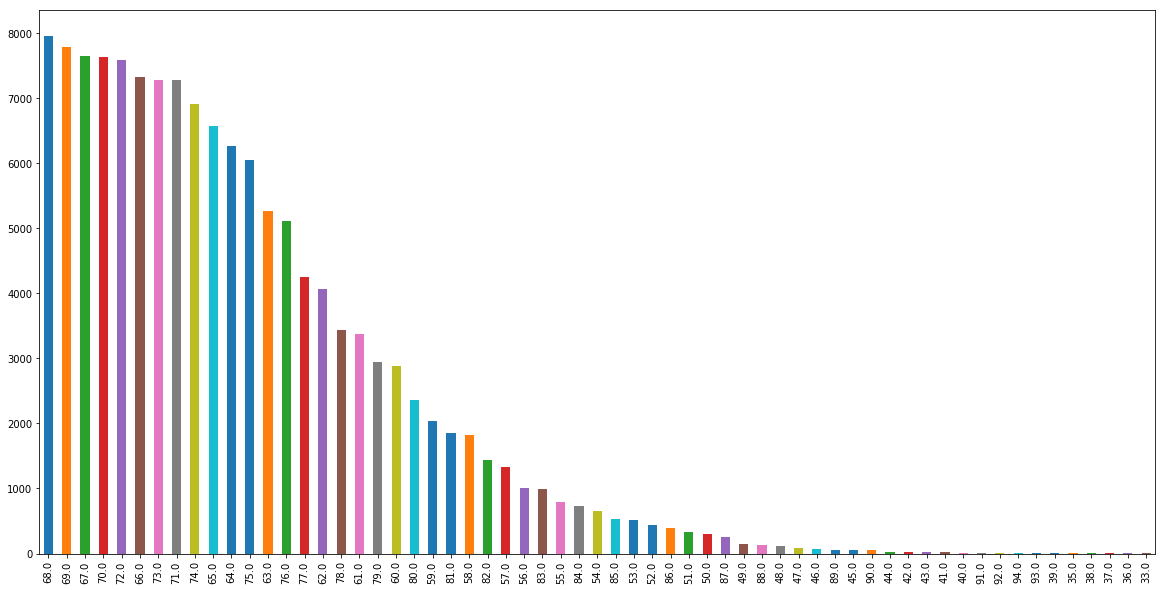

In [38]:
# Visualize the overall_rating column
soocer_data['overall_rating'].value_counts().plot(kind='bar',figsize=(20,10))


In [39]:
# split the dataframe into X and Y
X = soocer_data.drop('overall_rating',axis=1) # including all the columns except the target i.e overall_rating
Y = soocer_data['overall_rating'] # only the target feature('overall_rating')

In [40]:
# create the train and test dataframes
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(109027, 62)
(27257, 62)
(109027,)
(27257,)


# Creating and Training the Model

In [41]:
# creating the instance of linear regression model
lm = LinearRegression()
# fit the model
lm.fit(X_train,Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
# print the intercept
print(lm.intercept_)

-2.3538577867371657


In [43]:
# print the coefficients
print(lm.coef_)

[ 3.85527878e-01  1.98603681e-02  9.82276147e-03  6.72005943e-02
  5.04599675e-02  4.06359294e-03 -1.06485256e-02  1.27425110e-02
  1.32954335e-02  8.77318329e-03  1.27427087e-01  6.43300741e-03
  9.92473964e-03 -1.06194487e-02  2.09112923e-01  7.54033811e-03
  1.63340859e-02  1.48206170e-02 -5.24772500e-03  5.62437793e-02
 -1.32703305e-02  1.88159174e-02  1.07269368e-02 -1.05735462e-02
 -4.32873688e-03  1.38384551e-02  3.10540276e-02  8.49514984e-04
 -2.43354465e-02  1.59660289e-01  3.17298791e-02 -3.06051326e-02
  5.28774044e-02  2.50598242e-02 -4.42594018e-03  4.42594018e-03
 -4.30824283e-01  1.85726343e-01 -4.61548091e-01  1.38682705e+00
  7.65304563e-02 -1.40562983e-01 -6.27629547e-01  1.14810584e-02
 -1.15063610e-01  5.05879726e-01 -2.82896157e-01  5.12414216e-01
 -9.10895509e-01 -4.09434512e-01  2.28414553e-01  5.86110998e-01
  8.06769641e-01  8.27756115e-01 -4.61548091e-01  1.14810584e-02
 -2.19223291e-01  1.31780847e-01 -5.02467962e-01  5.91145093e-02
 -1.40562983e-01 -6.27629

# predict the 'overall_rating' with the test data

In [44]:
Y_pred = lm.predict(X_test)

In [45]:
Y_pred.shape

(27257,)

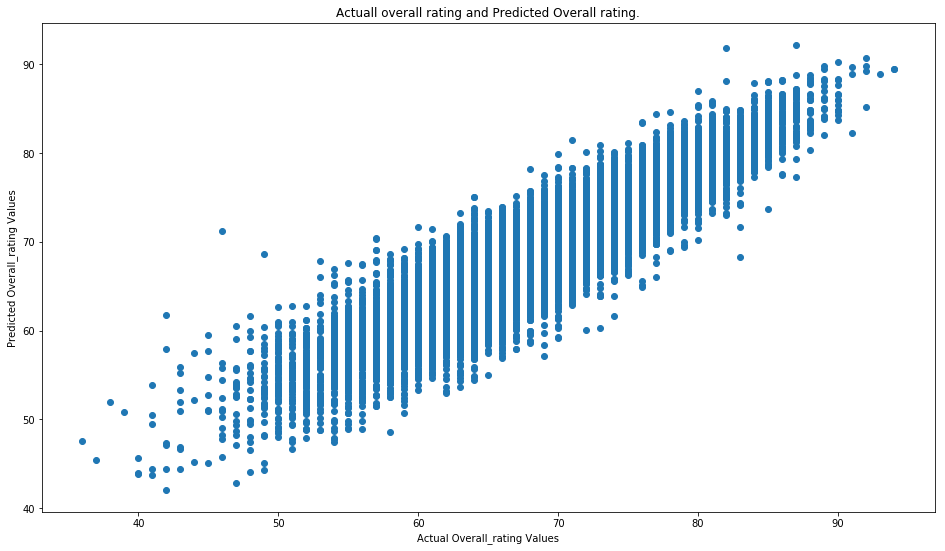

In [46]:
# visualize the overall_rating with actual and predicted using scatter plot
plt.figure(figsize=(16,9))
plt.scatter(Y_test,Y_pred)
plt.xlabel("Actual Overall_rating Values")
plt.ylabel("Predicted Overall_rating Values")
plt.title("Actuall overall rating and Predicted Overall rating.")
plt.show()
          

C:\Users\Dikshit\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


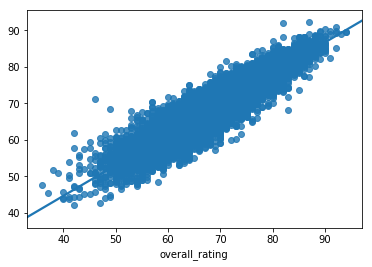

In [47]:
sns.regplot(Y_test, Y_pred, data=soocer_data, fit_reg=True) #Plot Y_test and Y_pred for Linear Regression Model.

In [56]:
# Model Evaluation using cross validation
lr = LinearRegression()
scores = cross_val_score(lr, X, Y,scoring='neg_mean_squared_error', cv=10)
print(scores)

[-7.63939068 -7.42001611 -7.35903626 -7.50636826 -7.4629057  -7.9230951
 -7.27908833 -7.63890304 -7.57817331 -7.54836498]


In [57]:
np.sqrt(scores.mean() * -1)

2.7450927447841926

In [58]:
# calculating Mean squared error
mse = mean_squared_error(Y_test,Y_pred)
print(mse)

7.6006670992669445


In [60]:
RMSE = sqrt(mean_squared_error(Y_test,Y_pred))

In [61]:
print(RMSE)

2.7569307389317825


In [73]:
# using Decision Tree Regressor
regressor = DecisionTreeRegressor(max_depth=20)
regressor.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [75]:
y_prediction = regressor.predict(X_test)
y_prediction

array([78.        , 74.77777778, 70.        , ..., 67.        ,
       76.90909091, 74.        ])

In [76]:
RMSE = sqrt(mean_squared_error(Y_test,y_prediction))
print(RMSE)

1.6904114327807915


In [81]:
rss=((Y_test-y_prediction)**2).sum()
mse=np.mean((Y_test-y_prediction)**2)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 1.690411432780796


# Project 2: Application of Classification Model

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
dataset = pd.read_csv('adult.csv')

In [64]:
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [65]:
dataset.shape

(32561, 15)

In [66]:
dataset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [67]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [69]:
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [71]:
dataset.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [73]:
dataset = dataset.replace('?', np.NaN)
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [74]:
dataset = dataset.dropna()
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [75]:
dataset.shape

(30162, 15)

In [76]:
dataset['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [77]:
dataset['income'] = dataset['income'].map({'<=50K':0,'>50K':1})


In [81]:
# store the numerical datatypes 
df_numerical = dataset.select_dtypes(exclude='object')
df_numerical.columns

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'income'],
      dtype='object')

In [82]:
dataset['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [83]:
dataset['marital.status'] = dataset['marital.status'].replace(['Widowed','Divorced','Separated','Never-married'],'single')
dataset['marital.status'] = dataset['marital.status'].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'],'married')

In [84]:
dataset['marital.status'].unique()

array(['single', 'married'], dtype=object)

In [85]:
categorical_df = dataset.select_dtypes(include='object')
categorical_df.columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')

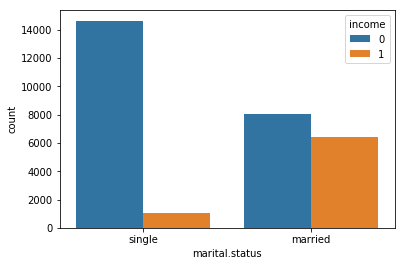

In [86]:
sns.countplot(dataset['marital.status'],hue=dataset['income'])

In [87]:
# encoding categorical variables for classification
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [88]:
categorical_df = categorical_df.apply(enc.fit_transform)
categorical_df.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
1,2,11,1,3,1,4,0,38
3,2,5,1,6,4,4,0,38
4,2,15,1,9,3,4,0,38
5,2,11,1,7,4,4,0,38
6,2,0,1,0,4,4,1,38


In [89]:
categorical_df.dtypes

workclass         int32
education         int32
marital.status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
native.country    int32
dtype: object

In [91]:
dataset = dataset.drop(categorical_df.columns, axis=1)
dataset = pd.concat([dataset,categorical_df],axis=1)
dataset.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass,education,marital.status,occupation,relationship,race,sex,native.country
1,82,132870,9,0,4356,18,0,2,11,1,3,1,4,0,38
3,54,140359,4,0,3900,40,0,2,5,1,6,4,4,0,38
4,41,264663,10,0,3900,40,0,2,15,1,9,3,4,0,38
5,34,216864,9,0,3770,45,0,2,11,1,7,4,4,0,38
6,38,150601,6,0,3770,40,0,2,0,1,0,4,4,1,38


# Problem 1:
# Prediction task is to determine whether a person makes over 50K a year.


In [92]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X = dataset.drop('income',axis=1)
y = dataset['income']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 23) 

In [79]:
# Model building with Logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\Dikshit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [80]:
y_pred = logreg.predict(X_test)

In [81]:
from sklearn import metrics
print("Logistic Regression:",100 * metrics.accuracy_score(y_test,y_pred))

Logistic Regression: 83.65565255829374


In [85]:
#cross_val_score for Logistic regression
from sklearn.model_selection import cross_val_score
log_reg =LogisticRegression()
cv_res = cross_val_score(log_reg,X_train,y_train,cv=10)
print(cv_res.mean()*100)

C:\Users\Dikshit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dikshit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dikshit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dikshit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dikshit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

83.76830838553624


In [107]:
# Model building with decision tree classifier
from sklearn.tree import DecisionTreeClassifier
Dtc = DecisionTreeClassifier()
Dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [77]:
Dtc_pred = Dtc.predict(X_test)
print("Decision Tree Classifier:",100 * metrics.accuracy_score(y_test,Dtc_pred))

Decision Tree Classifier: 80.8597635097801


In [84]:
# cross validation score for Decision Tree classifier
clf = DecisionTreeClassifier()
cv_res = cross_val_score(clf,X_train,y_train,cv=10)
print(cv_res.mean()*100)

81.46166773409398


In [73]:
# Model building with Random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

C:\Users\Dikshit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [76]:
rfc_pred = rfc.predict(X_test)
print("Random Forest classifier:", 100 * metrics.accuracy_score(y_test,rfc_pred))

Random Forest classifier: 82.8599845286772


In [82]:
# cross validation score for Random forest classifier
clf = RandomForestClassifier(n_estimators=100)
cv_res = cross_val_score(clf,X_train,y_train,cv=10)
print(cv_res.mean()*100)

83.91506625065233


In [88]:
# Used the  Grid search for hyper parameter tuning
from sklearn.model_selection import KFold,GridSearchCV
clf = RandomForestClassifier()
clf=RandomForestClassifier()
kf=KFold(n_splits=3)
max_features=np.array([1,2,3,4,5])
n_estimators=np.array([25,50,100,150,200])
min_samples_leaf=np.array([25,50,75,100])
param_grid=dict(n_estimators=n_estimators,max_features=max_features,min_samples_leaf=min_samples_leaf)
grid=GridSearchCV(estimator=clf,param_grid=param_grid,cv=kf)
gres_fit=grid.fit(X_train,y_train)
print("Best",gres_fit.best_score_)
print("params",gres_fit.best_params_)

Best 0.8517501065694122
params {'max_features': 5, 'min_samples_leaf': 25, 'n_estimators': 200}


In [89]:
# Fit themodel with tuned parameters
clf = RandomForestClassifier(n_estimators=200,max_features=5,min_samples_leaf=25)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=25, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [91]:
# make predictions
pred = clf.predict(X_test)
pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [92]:
# Evaluation metrics
print("Accuracy:",100 * metrics.accuracy_score(y_test,pred))

Accuracy: 85.2469886175268


In [1]:
'Problem 2:'
'Which factors are important '
print("We find that Capital Gain is one of the key predictors followed by education for the income levels.")

We find that Capital Gain is one of the key predictors followed by education for the income levels.


In [2]:
'Problem 3:'
'Which algorithms are best for this dataset'
print("Random Forest Classifier is the best algorithm gives more accuracy with 85.1 %")

Random Forest Classifier is the best algorithm gives more accuracy with 85.1 %


# Project 3: TimeSeries Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot 
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
from datetime import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
df = pd.read_csv("data_stocks.csv")
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [ ]:
'''
1. NASDAQ.AAPL
2. NASDAQ.ADP
3. NASDAQ.CBOE
4. NASDAQ.CSCO
5. NASDAQ.EBAY
'''

# 1. NASDAQ.AAPL

In [3]:
# Taking log of the column
df['log_AAPL']=np.log(df['NASDAQ.AAPL'])

In [4]:
# import datetime for date time conversion
from datetime import datetime
# datetime conversion and created a new column NDATE
df['NDATE']=pd.to_datetime(df['DATE'],unit='s')

df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,log_AAPL,NDATE
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,4.967589,2017-04-03 13:30:00
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,4.967728,2017-04-03 13:31:00
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,4.967659,2017-04-03 13:32:00
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,4.967310,2017-04-03 13:33:00
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,4.967449,2017-04-03 13:34:00


In [5]:
# df['new']=df['DATE'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime("%Y-%m-%d %H:%M:%S")
#Durbin_watson test is used to check the presence of Autocorrelation in residuals in regression analysis. 
#The Durbin-Watson statistic is always between 0 and 4. 
#A value of 2 means that there is no autocorrelation in the sample.  
#Values from 0 to less than 2 indicate positive autocorrelation and values from more than 2 to 4 indicate negative autocorrelation.

import statsmodels.api as sm 
sm.stats.durbin_watson(df['log_AAPL'])

1.5195875753588083e-08

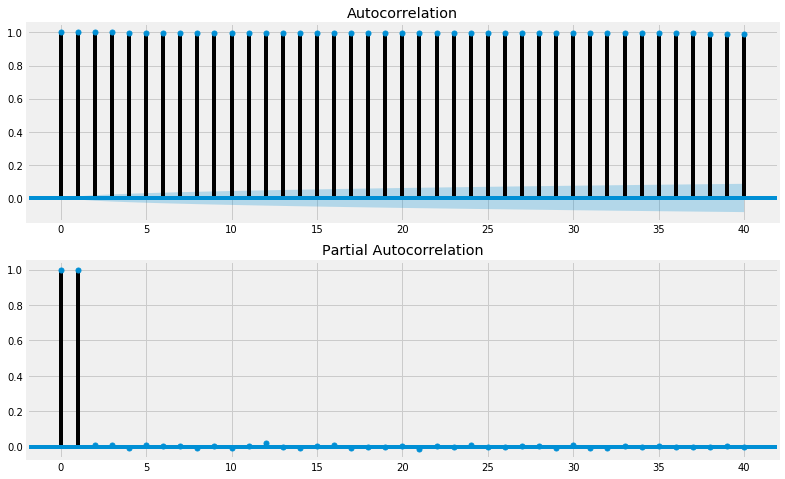

In [6]:
%matplotlib inline 
fig = plt.figure(figsize=(12,8))
# for Auto-correlation plot 
ax1 = fig.add_subplot(211) 
fig = sm.graphics.tsa.plot_acf(df['log_AAPL'].values.squeeze(), lags=40, ax=ax1) 
#for partial Auto-correlation plot 
ax2 = fig.add_subplot(212) 
fig = sm.graphics.tsa.plot_pacf(df['log_AAPL'], lags=40, ax=ax2)

In [9]:
# convert pandas column into matrix to use in ARIMA model
AAPL_array=df["log_AAPL"].dropna().values

In [10]:
AAPL_array

array([4.9675886 , 4.96772779, 4.9676589 , ..., 5.0999274 , 5.09913445,
       5.09974447])

In [11]:
# residuals 
df['diff_log_AAPL']= df["log_AAPL"]-df["log_AAPL"].shift(periods=-1) 


In [12]:
#Building model 
model_AAPL = ARIMA(AAPL_array, (2,2,1)).fit()

In [20]:
# prediction 
predAAPL=model_AAPL.predict()
predAAPL

array([-1.46943397e-09,  1.03529273e-04,  2.60540732e-04, ...,
       -5.64259110e-05,  6.63262055e-04,  7.82788321e-04])

In [16]:
# Printing parameters AIC,BIC,HQIC
print(model_AAPL.aic,model_AAPL.bic,model_AAPL.hqic)

-492060.6927971314 -492017.5540684908 -492047.0581161025


In [19]:
best_values = [0,0,0]
best_values

[0, 0, 0]

In [21]:
len(predAAPL)

41264

In [23]:
best_aic = 1e20
try:
    for p in range(3):
        for d in range(3):
            for q in range(3):
                model = ARIMA(AAPL_array,(p,d,q)).fit()
                if model.aic <best_aic:
                    best_values = [p,d,q]
except:
    pass
print(best_values)

[0, 2, 1]


C:\Users\Dikshit\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Dikshit\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [25]:
# fitting the model with best_values
model_AAPL_best = ARIMA(AAPL_array, (0,2,1)).fit()

C:\Users\Dikshit\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Dikshit\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [27]:
AAPL_pred = model_AAPL_best.predict()
AAPL_pred

array([-4.55600483e-09,  1.04035308e-04,  2.55906626e-04, ...,
       -5.37779283e-05,  6.76805096e-04,  7.98326468e-04])

In [28]:
len(AAPL_pred)

41264

In [31]:
# calculating the mean_squared_error metrics
from sklearn.metrics import mean_squared_error
print(mean_squared_error(df['log_AAPL'][2:],AAPL_pred))

25.12993807509492


# 2.NASDAQ.ADP

In [32]:
ADP=df['NASDAQ.ADP']

In [33]:
ADP.dtype

dtype('float64')

In [34]:
# convert pandas column into matrix to use in ARIMA model
ADP_array=df["NASDAQ.ADP"].dropna().values

In [35]:
# residuals 
df['diff_log_ADP']= df["NASDAQ.ADP"]-df["NASDAQ.ADP"].shift(periods=-1) 

In [76]:
#Building model 
model_ADP = ARIMA(ADP_array, (0,2,1)).fit()

In [77]:
# prediction 
predADP=model_ADP.predict()
predADP

array([ 8.60642749e-08, -8.12484844e-02,  4.24998877e-02, ...,
       -2.43106829e-02,  7.02776400e-02,  1.19577112e-01])

In [78]:
print(model_ADP.aic,model_ADP.bic,model_ADP.hqic)

-97294.91616199141 -97269.03292480705 -97286.73535337404


In [79]:
len(predADP)

41264

In [82]:
rmse_adp = np.sqrt(mean_squared_error(df['diff_log_ADP'][1:-1],predADP))
rmse_adp

0.10185273368502117

In [83]:
np.exp(rmse_adp)

1.1072204034523103

# 3.NASDAQ.CBOE

In [49]:
#log transformation 
df['log_CBoE']=np.log(df['NASDAQ.CBOE']) 

In [50]:
# creating matrix 
CBoE_array=df["log_CBoE"].dropna().values

In [51]:
# residuals 
df['diff_log_CBoE']= df["log_CBoE"]-df["log_CBoE"].shift(periods=-1) 

In [52]:
#Building model 
model_CBoE = ARIMA(CBoE_array, (2,2,1)).fit()

In [53]:
 # prediction 
predCBoE=model_CBoE.predict()
predCBoE

array([4.00513337e-10, 1.14952421e-03, 1.50201890e-03, ...,
       1.12907275e-04, 2.21761199e-04, 3.30377139e-04])

In [54]:
print(model_CBoE.aic,model_CBoE.bic)

-506313.84439545294 -506270.7056668123


In [56]:
rmse_CBoE = np.sqrt(mean_squared_error(df['diff_log_CBoE'][1:-1],predCBoE))
rmse_CBoE

0.0007971976394258527

In [57]:
np.exp(rmse_CBoE)

1.0007975154859206

# 4. NASDAQ.CSCO

In [58]:
from sklearn.metrics import mean_squared_error 
df['CSCO_log']=np.log(df['NASDAQ.CSCO']) 
CSCO_array=df['CSCO_log'].dropna().values 
df['diff_CSCO_log']= df['CSCO_log']-df["CSCO_log"].shift(periods=-1) 
#Here periods=-1 is used beacuse current row is subtracted from next row  
model_CSCO = ARIMA(CSCO_array, (2,2,1)).fit() 
df['diff_CSCO_log'].shape

(41266,)

In [61]:
rmse=np.sqrt(mean_squared_error(df['diff_CSCO_log'][1:-1],model_CSCO.predict()))
rmse

0.0009163582680549917

In [59]:
# predictions
predCSCO = model_CSCO.predict()
predCSCO

array([-6.58878750e-10,  1.69687255e-03,  2.54435476e-03, ...,
       -5.11271186e-04, -5.14916678e-05,  1.12670063e-04])

In [62]:
model_CSCO.aic

-486449.69776279497

In [66]:
np.exp(rmse)

1.0009167782525683

# 5. NASDAQ.EBAY

In [67]:
df['log_EBAY']=np.log(df['NASDAQ.EBAY'])


In [68]:
Ebay_array=df["log_EBAY"].dropna().values


In [69]:
df['diff_log_EBAY']= df["log_EBAY"]-df["log_EBAY"].shift(periods=-1)


In [70]:
model_Ebay = ARIMA(Ebay_array, (2,2,1)).fit()


In [71]:
predEbay=model_Ebay.predict()
predEbay

array([-5.99007295e-09, -2.74943393e-04,  1.72063582e-03, ...,
        1.03520129e-04, -4.10329287e-05,  2.43219258e-04])

In [73]:
print(model_Ebay.aic,model_Ebay.bic)

-486004.33842856827 -485961.19969992765


In [74]:
rmse_ebay=np.sqrt(mean_squared_error(df['diff_log_EBAY'][1:-1],predEbay))
rmse_ebay

0.000974545272105309

In [75]:
np.exp(rmse_ebay)

1.000975020295647

# Project: Application of Clustering Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv("data_stocks.csv")
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [4]:
df.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [5]:
from sklearn.preprocessing import StandardScaler
features = df.values
sc = StandardScaler()
X_scaled = sc.fit_transform(features)
print("Shape of scaled features: ")
print(X_scaled.shape)

Shape of scaled features: 
(41266, 502)


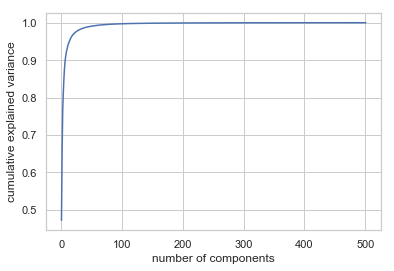

In [6]:
sns.set()
sns.set_style('whitegrid')
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [7]:
# Applying PCA for Dimension Reduction from 502 to 2 dimensions for better data visualization
pca = PCA(n_components=2)
pca.fit(X_scaled)
print('explained variance: ')
print(pca.explained_variance_)

explained variance: 
[237.01475857  86.20695296]


In [8]:
print('PCA Components:')
print(pca.components_)

PCA Components:
[[-0.0641156  -0.06100625 -0.03912755 ... -0.06222908  0.00249839
  -0.05149673]
 [ 0.01345954 -0.01783581 -0.06428133 ... -0.02036739 -0.08124665
  -0.05945237]]


In [9]:
X_transformed = pca.transform(X_scaled)
print('First 5 rows of the Transformed Feature values :')
print(X_transformed[:5,:])
print('Transformed Feature shape :')
print(X_transformed.shape)
print('Original Feature shape :')
print(X_scaled.shape)
print('Restransformed Feature shape :')
X_retransformed = pca.inverse_transform(X_transformed)
print(X_retransformed.shape)
print('First 5 rows of the Retransformed Feature values :')
print(X_retransformed[:5,:])

First 5 rows of the Transformed Feature values :
[[25.64715405  9.99154156]
 [25.74447983  9.87809253]
 [25.66169481  9.81134664]
 [25.76412613  9.97993834]
 [25.67551977  9.86346559]]
Transformed Feature shape :
(41266, 2)
Original Feature shape :
(41266, 502)
Restransformed Feature shape :
(41266, 502)
First 5 rows of the Retransformed Feature values :
[[-1.50990118 -1.74284403 -1.64577982 ... -1.7995004  -0.74770277
  -1.91476551]
 [-1.51766825 -1.74675806 -1.64229528 ... -1.80324623 -0.73824226
  -1.91303266]
 [-1.51325881 -1.74051719 -1.63476559 ... -1.79673515 -0.7330262
  -1.9048013 ]
 [-1.51755709 -1.74977311 -1.64961078 ... -1.80654313 -0.7464678
  -1.92009935]
 [-1.51344371 -1.74229018 -1.63865681 ... -1.798657   -0.73722615
  -1.90861183]]


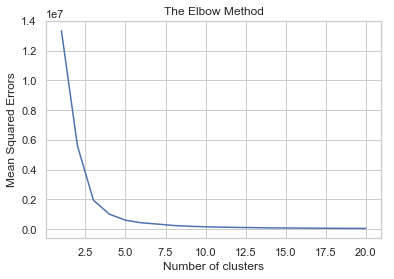

In [10]:
#Finding the optimum number of clusters for KMEANS cluster
wcss=[]
for i in range(1,21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Mean Squared Errors')
plt.show()

In [11]:
# Optimum no of clusters from the elbow method is determined to be 5
# Applying the k-means clustering to find the stocks which are similar in performance
k_means = KMeans(n_clusters=5,random_state=0,init='k-means++')
k_means.fit(X_transformed)
y_kmeans = kmeans.fit_predict(X_transformed)
labels = k_means.labels_
print("labels generated :\n",labels)

labels generated :
 [3 3 3 ... 2 2 2]


In [12]:
len(labels)

41266

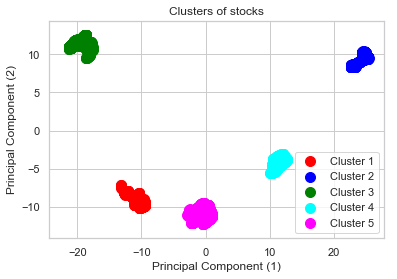

In [13]:
# visualising the clusters
plt.scatter(X_transformed[y_kmeans == 0, 0], X_transformed[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_transformed[y_kmeans == 1, 0], X_transformed[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_transformed[y_kmeans == 2, 0], X_transformed[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_transformed[y_kmeans == 3, 0], X_transformed[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_transformed[y_kmeans == 4, 0], X_transformed[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of stocks')
plt.xlabel('Principal Component (1)')
plt.ylabel('Principal Component (2)')
plt.legend()
plt.show()

In [14]:
# Problem 2
# To find out the number of Unique patterns that exist in the historical stock data set, based on fluctuations in price
df_comp = pd.DataFrame(pca.components_,columns=df.columns)
df_comp.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,-0.064116,-0.061006,-0.039128,-0.040896,-0.062662,-0.009756,-0.035746,-0.054455,0.050145,-0.035261,...,-0.049236,0.056778,-0.054394,-0.050423,0.046987,-0.057669,-0.061151,-0.062229,0.002498,-0.051497
1,0.013460,-0.017836,-0.064281,0.033885,0.001886,-0.032434,0.043464,-0.029479,0.016120,0.058259,...,-0.058924,0.030252,0.013685,-0.040764,-0.052832,0.010248,0.031474,-0.020367,-0.081247,-0.059452


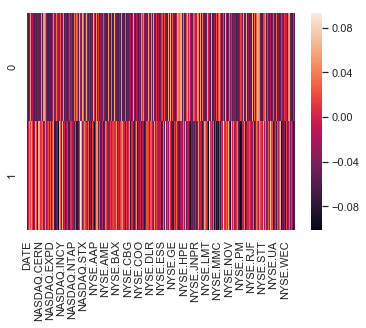

In [15]:
sns.set_style('whitegrid')
sns.heatmap(df_comp)

In [17]:
df['labels'] = labels
df['labels'].unique().tolist()

[3, 0, 4, 1, 2]

In [18]:
for i in df['labels'].unique().tolist():
    count = df[df['labels'] == i].shape[0]
    print('\nFor lablel {} the number of similar stock performances is : {} '.format(i,count))


For lablel 3 the number of similar stock performances is : 5872 

For lablel 0 the number of similar stock performances is : 8627 

For lablel 4 the number of similar stock performances is : 11161 

For lablel 1 the number of similar stock performances is : 5868 

For lablel 2 the number of similar stock performances is : 9738 
